<a href="https://colab.research.google.com/github/programmingBae/UTS-ComputerVision/blob/main/UTS_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
file_name = "sample_data/train_data.zip"

In [2]:
import zipfile
#import dependencies
import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras import regularizers, optimizers
import numpy as np
from matplotlib import pyplot as plt

In [3]:
with zipfile.ZipFile(file_name, "r") as zip:
  zip.extractall()
  print("Extract Done")

Extract Done


In [56]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    # width_shift_range=0.2,
    # height_shift_range=0.2,
    # shear_range=0.2,
    validation_split=0.1
    )

In [57]:
train_generator = train_datagen.flow_from_directory('train_data/train/', class_mode ='categorical', batch_size=5, target_size=(28, 28), color_mode ="grayscale", subset="training") 
train_generator.class_indices
validation_generator = train_datagen.flow_from_directory('train_data/train/', class_mode ='categorical', batch_size=5, target_size=(28, 28), color_mode ="grayscale", subset="validation") 



Found 576 images belonging to 4 classes.
Found 64 images belonging to 4 classes.


In [ ]:
model = Sequential() 

# block #1
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), 
activation='relu', padding='same', input_shape=(28,28, 3)))
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), 
activation='relu', padding='same'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
# # block #2
model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), 
activation='relu', padding='same'))
model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), 
activation='relu', padding='same'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
# # block #3
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), 
activation='relu', padding='same'))
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), 
activation='relu', padding='same'))
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), 
activation='relu', padding='same'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
# # block #4
model.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), 
activation='relu', padding='same'))
model.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), 
activation='relu', padding='same'))
model.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), 
activation='relu', padding='same'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

# block #6 (classifier)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

In [107]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(4, (3,3), activation='relu', input_shape=(28,28, 1)),
    tf.keras.layers.Conv2D(4, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.1),
    # The second convolution
    tf.keras.layers.Conv2D(8, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(8, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.1),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(4, activation='softmax')
    ])

In [108]:
model.compile(optimizer = "adam",
                loss = "categorical_crossentropy",
                metrics=["accuracy"])

In [105]:
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=10)

In [109]:
# Train your model
history = model.fit(train_generator,
                    epochs=50,
                    validation_data=validation_generator,
                    callbacks=[callback])


Epoch 1/50
116/116 [==============================] - 2s 9ms/step - loss: 1.3910 - accuracy: 0.2240 - val_loss: 1.3857 - val_accuracy: 0.2969
Epoch 2/50
116/116 [==============================] - 1s 7ms/step - loss: 1.3865 - accuracy: 0.2431 - val_loss: 1.3854 - val_accuracy: 0.2656
Epoch 3/50
116/116 [==============================] - 1s 7ms/step - loss: 1.3877 - accuracy: 0.2448 - val_loss: 1.3854 - val_accuracy: 0.2656
Epoch 4/50
116/116 [==============================] - 1s 7ms/step - loss: 1.3858 - accuracy: 0.2674 - val_loss: 1.3840 - val_accuracy: 0.2500
Epoch 5/50
116/116 [==============================] - 1s 7ms/step - loss: 1.3861 - accuracy: 0.2361 - val_loss: 1.3835 - val_accuracy: 0.2500
Epoch 6/50
116/116 [==============================] - 1s 7ms/step - loss: 1.3863 - accuracy: 0.2552 - val_loss: 1.3815 - val_accuracy: 0.3594
Epoch 7/50
116/116 [==============================] - 1s 7ms/step - loss: 1.3870 - accuracy: 0.2396 - val_loss: 1.3844 - val_accuracy: 0.2500
Epoch 

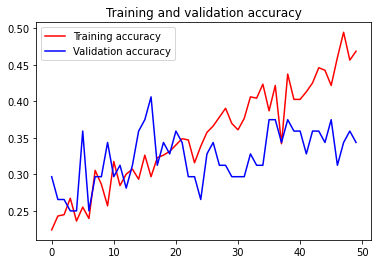

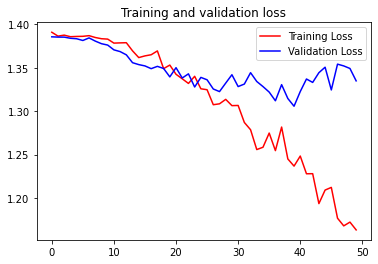

In [110]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()